In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
from matplotlib.colors import ListedColormap
from matplotlib import cm
import seaborn as sns
%matplotlib inline
import os
import collections
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.colors import n_colors
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from plotly import tools
from IPython.display import display, HTML

# FEATURE ENGINEERING. 
### Encodings, generating the features from datetime, sum, code, type.

In [339]:
test=pd.read_csv('test_set.csv',delimiter=';')
train_set=pd.read_csv('train_set.csv',delimiter=';')
types=pd.read_csv('types.csv',delimiter=';')
codes=pd.read_csv('codes.csv',delimiter=';')
transactions=pd.read_csv('transactions.csv',delimiter=';')

In [340]:
# working with datetime and sum columns
date_time = pd.DataFrame(transactions["datetime"].str.split(' ', expand=True).values,
             columns=['Date', 'Time'])
transactions['date'] = date_time['Date']    
transactions['date'] = transactions['date'].astype('int64')
transactions['time'] = date_time['Time']

transactions['plus_sum'] = transactions['sum']
transactions['minus_sum'] = transactions['sum']

transactions['plus_sum'] = transactions[transactions['sum']>=0]['sum']
transactions['minus_sum'] = transactions[transactions['sum']<0]['sum']

transactions['plus_sum'] = transactions['plus_sum'].fillna(0)
transactions['minus_sum'] = transactions['minus_sum'].fillna(0)
transactions.head()


client_id      datetime  code  type         sum  date      time  plus_sum  \
0   96372458  421 06:33:15  6011  2010  -561478.94   421  06:33:15      0.00   
1   24567813  377 17:20:40  6011  7010    67377.47   377  17:20:40  67377.47   
2   21717441   55 13:38:47  6011  2010   -44918.32    55  13:38:47      0.00   
3   14331004  263 12:57:08  6011  2010 -3368873.66   263  12:57:08      0.00   
4   85302434  151 10:34:12  4814  1030    -3368.87   151  10:34:12      0.00   

    minus_sum  
0  -561478.94  
1        0.00  
2   -44918.32  
3 -3368873.66  
4    -3368.87

    Here we worked out with the column datetime splitted it by day number and time (in further feature egineering we will work with this column) and created new columns date and time. Also, we splitted sum column by plus_sum(amount of income) and minus_sum(amount of outcome).

In [341]:
# created new features with sum column by ranges
transactions['-50000-0'] = ((transactions['sum']<0) & (transactions['sum']>=-50000)).astype(int)
transactions['-100000--50000'] = ((transactions['sum']<-50000) & (transactions['sum']>=-100000)).astype(int)
transactions['-250000--100000'] = ((transactions['sum']<-100000) & (transactions['sum']>=-250000)).astype(int)
transactions['-500000--250000'] = ((transactions['sum']<-250000) & (transactions['sum']>=-500000)).astype(int)
transactions['--500000'] = ((transactions['sum']<-500000)).astype(int)
transactions['50000-100000'] = ((transactions['sum']>50000) & (transactions['sum']<=100000)).astype(int)
transactions['100000-250000'] = ((transactions['sum']>100000) & (transactions['sum']<=250000)).astype(int)
transactions['250000-500000'] = ((transactions['sum']>250000) & (transactions['sum']<=500000)).astype(int)
transactions['500000-'] = ((transactions['sum']>500000)).astype(int)
transactions.head()

client_id      datetime  code  type         sum  date      time  plus_sum  \
0   96372458  421 06:33:15  6011  2010  -561478.94   421  06:33:15      0.00   
1   24567813  377 17:20:40  6011  7010    67377.47   377  17:20:40  67377.47   
2   21717441   55 13:38:47  6011  2010   -44918.32    55  13:38:47      0.00   
3   14331004  263 12:57:08  6011  2010 -3368873.66   263  12:57:08      0.00   
4   85302434  151 10:34:12  4814  1030    -3368.87   151  10:34:12      0.00   

    minus_sum  -50000-0  -100000--50000  -250000--100000  -500000--250000  \
0  -561478.94         0               0                0                0   
1        0.00         0               0                0                0   
2   -44918.32         1               0                0                0   
3 -3368873.66         0               0                0                0   
4    -3368.87         1               0                0                0   

   --500000  50000-100000  100000-250000  250000-500000  500000-  
0         1             0              0              0        0  
1         0             1              0              0        0  
2         0             0              0              0        0  
3         1             0              0              0        0  
4         0             0              0              0        0

In [342]:
# working with codes -> creating new columns
transactions['income'] = (transactions['sum']>=0).astype(int)
transactions['outcome'] = (transactions['sum']<0).astype(int)
transactions['agriculture'] = (transactions['code']<=1499).astype(int)
transactions['contracts'] = ((transactions['code']>=1500) & (transactions['code']<=2999)).astype(int)
transactions['avia_services'] = ((transactions['code']>=3000) & (transactions['code']<=3299)).astype(int)
transactions['car_rent'] = ((transactions['code']>=3300) & (transactions['code']<=3499)).astype(int)
transactions['house_rent'] = ((transactions['code']>=3500) & (transactions['code']<=3999)).astype(int)
transactions['transports'] = ((transactions['code']>=4000) & (transactions['code']<=4799)).astype(int)
transactions['pub_utilities'] = ((transactions['code']>=4800) & (transactions['code']<=4999)).astype(int)
transactions['trade'] = ((transactions['code']>=5000) & (transactions['code']<=5599)).astype(int)
transactions['clothes_shops'] = ((transactions['code']>=5600) & (transactions['code']<=5699)).astype(int)
transactions['other_shops'] = ((transactions['code']>=5700) & (transactions['code']<=7299)).astype(int)
transactions['business_services'] = ((transactions['code']>=7300) & (transactions['code']<=7999)).astype(int)
transactions['prof_services'] = ((transactions['code']>=8000) & (transactions['code']<=8999)).astype(int)
transactions['gov_services'] = ((transactions['code']>=9000) & (transactions['code']<=9999)).astype(int)
transactions.head()

client_id      datetime  code  type         sum  date      time  plus_sum  \
0   96372458  421 06:33:15  6011  2010  -561478.94   421  06:33:15      0.00   
1   24567813  377 17:20:40  6011  7010    67377.47   377  17:20:40  67377.47   
2   21717441   55 13:38:47  6011  2010   -44918.32    55  13:38:47      0.00   
3   14331004  263 12:57:08  6011  2010 -3368873.66   263  12:57:08      0.00   
4   85302434  151 10:34:12  4814  1030    -3368.87   151  10:34:12      0.00   

    minus_sum  -50000-0  ...  car_rent  house_rent  transports  pub_utilities  \
0  -561478.94         0  ...         0           0           0              0   
1        0.00         0  ...         0           0           0              0   
2   -44918.32         1  ...         0           0           0              0   
3 -3368873.66         0  ...         0           0           0              0   
4    -3368.87         1  ...         0           0           0              1   

   trade  clothes_shops  other_shops  business_services  prof_services  \
0      0              0            1                  0              0   
1      0              0            1                  0              0   
2      0              0            1                  0              0   
3      0              0            1                  0              0   
4      0              0            0                  0              0   

   gov_services  
0             0  
1             0  
2             0  
3             0  
4             0  

[5 rows x 33 columns]

    income -> if sum is positive count as 1, otherwise 0 - for counting count of incomes

    outcome -> if sum is negative count as 1, otherwise 0 - for counting count of outcomes

##### codes
###### 0001-1499 -> agriculture,
###### 1500-2999 -> contracts,
###### 3000-3299 -> avia_services,
###### 3300-3499 -> car_rent,
###### 3500-3999 -> house_rent,
###### 4000-4799 -> transports,
###### 4800-4999 -> pub_utilities,
###### 5000-5599 -> trade,
###### 5600-5699 -> clothes_shops,
###### 5700-7299 -> other_shops,
###### 7300-7999 -> business_services,
###### 8000-8999 -> prof_services,
###### 9000-9999 -> gov_services.

These are unique codes in the bank world, so we did check and all of them fitted with the conditions.
And we created new 13 columns/features from codes column, new 2 columns from sum column

In [343]:
# working with types
# income
transactions['atm_contr'] = ((transactions['type'].astype(str).str.contains
('7010|7011|7014|7015|7020|7021|7024|7025|7060', regex = True)) & 
(transactions['sum']>0)).astype(int)
transactions['refill_acc'] = ((transactions['type'].astype(str).str.contains
('7050|7081|7082|7084', regex = True)) & (transactions['sum']>0)).astype(int)
transactions['refill_card'] = ((transactions['type'].astype(str).str.contains
('7030|7031|7034|7035|7040|7041|7044|7045|7070|7071|7074|7075', regex = True)) & 
(transactions['sum']>0)).astype(int)

# outcome
transactions['cash_withdr'] = ((transactions['type'].astype(str).str.contains
('2000|2001|2010|2011|2020|2021|2100|2110|2200|2210|2900', regex = True)) & 
(transactions['sum']<0)).astype(int)
transactions['transfer_acc'] = ((transactions['type'].astype(str).str.contains
('2401|2402|2412|2422|2432', regex = True)) & (transactions['sum']<0)).astype(int)
transactions['transfer_card'] = ((transactions['type'].astype(str).str.contains
('2330|2331|2340|2341|2370|2371|2440|2446|2456|2460', regex = True)) &
 (transactions['sum']<0)).astype(int)
transactions['transfer_leg_ent'] = ((transactions['type'].astype(str).str.contains
('2320|2323|2325', regex = True)) & (transactions['sum']<0) & 
(transactions['code']!=4900)).astype(int)
transactions['purchase'] = ((transactions['type'].astype(str).str.contains
('1000|1010|1030|1100|1110|1200|1210|1310|1410|1510|2901|2992|8035|8100|8145|2992|8035|8100|8146', 
regex = True)) & (transactions['sum']<0) & (transactions['code']!=4900)).astype(int)
transactions.head()

client_id      datetime  code  type         sum  date      time  plus_sum  \
0   96372458  421 06:33:15  6011  2010  -561478.94   421  06:33:15      0.00   
1   24567813  377 17:20:40  6011  7010    67377.47   377  17:20:40  67377.47   
2   21717441   55 13:38:47  6011  2010   -44918.32    55  13:38:47      0.00   
3   14331004  263 12:57:08  6011  2010 -3368873.66   263  12:57:08      0.00   
4   85302434  151 10:34:12  4814  1030    -3368.87   151  10:34:12      0.00   

    minus_sum  -50000-0  ...  prof_services  gov_services  atm_contr  \
0  -561478.94         0  ...              0             0          0   
1        0.00         0  ...              0             0          1   
2   -44918.32         1  ...              0             0          0   
3 -3368873.66         0  ...              0             0          0   
4    -3368.87         1  ...              0             0          0   

   refill_acc  refill_card  cash_withdr  transfer_acc  transfer_card  \
0           0            0            1             0              0   
1           0            0            0             0              0   
2           0            0            1             0              0   
3           0            0            1             0              0   
4           0            0            0             0              0   

   transfer_leg_ent  purchase  
0                 0         0  
1                 0         0  
2                 0         0  
3                 0         0  
4                 0         1  

[5 rows x 41 columns]

##### types
###### salary_contr -> sum > 0 and type in (7000)
###### atm_contr -> sum > 0 and type in (7010, 7011, 7014, 7015, 7020, 7021, 7024, 7025, 7060)
###### refill_acc -> sum > 0 and type in (7050, 7081, 7082, 7084)
###### refll_card -> sum > 0 and type in (7030, 7031, 7034, 7035, 7040, 7041, 7044, 7045, 7070, 7071, 7074, 7075)

###### cash_withdr -> sum < 0 and type in (2000, 2001, 2010, 2011, 2020, 2021, 2100, 2110, 2200, 2210, 2900)
###### transfer_acc -> sum < 0 and type in (2401, 2402, 2412, 2422, 2432)
###### transfer_card -> sum < 0 and type in (2330, 2331, 2340, 2341, 2370, 2371, 2440, 2446, 2456, 2460)
###### transfer_leg_ent -> sum < 0 and type in (2320, 2323, 2325) and not (mcc_code eq 4900)
###### purchase -> sum < 0 and (type in (1000, 1010, 1030, 1100, 1110, 1200, 1210, 1310, 1410, 1510, 2901, 2992, 8035, 8100, 8145, 2992, 8035, 8100, 8146) or code == 4900) and code != -1

    So, from types column we created new 9 features dividing by type of transactions.

In [344]:
# working with day -> creating new columns for month
transactions['Aug-2014'] = (transactions['date']<=30).astype(int)
transactions['Sep-2014'] = ((transactions['date']>30) & (transactions['date']<=60)).astype(int)
transactions['Oct-2014'] = ((transactions['date']>30) & (transactions['date']<=60)).astype(int)
transactions['Nov-2014'] = ((transactions['date']>60) & (transactions['date']<=91)).astype(int)
transactions['Dec-2014'] = ((transactions['date']>91) & (transactions['date']<=121)).astype(int)
transactions['Jan-2015'] = ((transactions['date']>121) & (transactions['date']<=152)).astype(int)
transactions['Feb-2015'] = ((transactions['date']>152) & (transactions['date']<=184)).astype(int)
transactions['Mar-2015'] = ((transactions['date']>184) & (transactions['date']<=214)).astype(int)
transactions['Apr-2015'] = ((transactions['date']>214) & (transactions['date']<=245)).astype(int)
transactions['May-2015'] = ((transactions['date']>245) & (transactions['date']<=275)).astype(int)
transactions['June-2015'] = ((transactions['date']>275) & (transactions['date']<=306)).astype(int)
transactions['July-2015'] = ((transactions['date']>306) & (transactions['date']<=367)).astype(int)
transactions['Aug-2015'] = ((transactions['date']>367) & (transactions['date']<=398)).astype(int)
transactions['Sep-2015'] = ((transactions['date']>398) & (transactions['date']<=428)).astype(int)
transactions['Oct-2015'] = ((transactions['date']>428) & (transactions['date']<=459)).astype(int)
transactions.head()


client_id      datetime  code  type         sum  date      time  plus_sum  \
0   96372458  421 06:33:15  6011  2010  -561478.94   421  06:33:15      0.00   
1   24567813  377 17:20:40  6011  7010    67377.47   377  17:20:40  67377.47   
2   21717441   55 13:38:47  6011  2010   -44918.32    55  13:38:47      0.00   
3   14331004  263 12:57:08  6011  2010 -3368873.66   263  12:57:08      0.00   
4   85302434  151 10:34:12  4814  1030    -3368.87   151  10:34:12      0.00   

    minus_sum  -50000-0  ...  Jan-2015  Feb-2015  Mar-2015  Apr-2015  \
0  -561478.94         0  ...         0         0         0         0   
1        0.00         0  ...         0         0         0         0   
2   -44918.32         1  ...         0         0         0         0   
3 -3368873.66         0  ...         0         0         0         0   
4    -3368.87         1  ...         1         0         0         0   

   May-2015  June-2015  July-2015  Aug-2015  Sep-2015  Oct-2015  
0         0          0          0         0         1         0  
1         0          0          0         1         0         0  
2         0          0          0         0         0         0  
3         1          0          0         0         0         0  
4         0          0          0         0         0         0  

[5 rows x 56 columns]

    We made an analysis and find out that the least day when amount of clients made transactions was day number 153. We took it as Januray 2015, becuase we thought that after NY holiday there will be less people who will make transactions. From day column we created new 15 features as monthes starting from august 2014 and till October of 2015. 

In [345]:
# working with parts of day
day_part = pd.DataFrame(transactions["time"].str.split(':', expand=True).values,
             columns=['Hour', 'Min', 'Sec'])
transactions['hour'] = (day_part['Hour']).astype(int)

transactions['early_mor'] = ((transactions['hour']>4) & (transactions['hour']<8)).astype(int)
transactions['morning'] = ((transactions['hour']>=8) & (transactions['hour']<=10)).astype(int)
transactions['late_mor'] = ((transactions['hour']>10) & (transactions['hour']<=11)).astype(int)
transactions['early_aft'] = ((transactions['hour']>12) & (transactions['hour']<=14)).astype(int)
transactions['late_aft'] = ((transactions['hour']>14) & (transactions['hour']<=16)).astype(int)
transactions['early_eve'] = ((transactions['hour']>16) & (transactions['hour']<=18)).astype(int)
transactions['late_eve'] = ((transactions['hour']>18) & (transactions['hour']<=21)).astype(int)
transactions['night'] = ((transactions['hour']>21) | (transactions['hour']<=4)).astype(int)
transactions.head()

client_id      datetime  code  type         sum  date      time  plus_sum  \
0   96372458  421 06:33:15  6011  2010  -561478.94   421  06:33:15      0.00   
1   24567813  377 17:20:40  6011  7010    67377.47   377  17:20:40  67377.47   
2   21717441   55 13:38:47  6011  2010   -44918.32    55  13:38:47      0.00   
3   14331004  263 12:57:08  6011  2010 -3368873.66   263  12:57:08      0.00   
4   85302434  151 10:34:12  4814  1030    -3368.87   151  10:34:12      0.00   

    minus_sum  -50000-0  ...  Oct-2015  hour  early_mor  morning  late_mor  \
0  -561478.94         0  ...         0     6          1        0         0   
1        0.00         0  ...         0    17          0        0         0   
2   -44918.32         1  ...         0    13          0        0         0   
3 -3368873.66         0  ...         0    12          0        0         0   
4    -3368.87         1  ...         0    10          0        1         0   

   early_aft  late_aft  early_eve  late_eve  night  
0          0         0          0         0      0  
1          0         0          1         0      0  
2          1         0          0         0      0  
3          0         0          0         0      0  
4          0         0          0         0      0  

[5 rows x 65 columns]

    Here we worked with time column, with its hour part. We divided it to parts of a day, morning: early morning, morning, late morning; afternoon: early afternoon, late afternoon; evening: early evening late evening; and night. 

In [346]:
# creating list with days of weeksby loop
list_weeks = []
for i in range(0, 7):
    list_fr = np.arange(start=i, stop=457, step=7)
    list_weeks.append(list_fr)

In [347]:
# we created 7 new columns with week days by using date column
transactions['Monday'] = (transactions['date'].isin(list_weeks[3])).astype(int)
transactions['Tuesday'] = (transactions['date'].isin(list_weeks[4])).astype(int)
transactions['Wednesday'] = (transactions['date'].isin(list_weeks[5])).astype(int)
transactions['Thursday'] = (transactions['date'].isin(list_weeks[6])).astype(int)
transactions['Friday'] = (transactions['date'].isin(list_weeks[0])).astype(int)
transactions['Saturday'] = (transactions['date'].isin(list_weeks[1])).astype(int)
transactions['Sunday'] = (transactions['date'].isin(list_weeks[2])).astype(int)
transactions.head()

client_id      datetime  code  type         sum  date      time  plus_sum  \
0   96372458  421 06:33:15  6011  2010  -561478.94   421  06:33:15      0.00   
1   24567813  377 17:20:40  6011  7010    67377.47   377  17:20:40  67377.47   
2   21717441   55 13:38:47  6011  2010   -44918.32    55  13:38:47      0.00   
3   14331004  263 12:57:08  6011  2010 -3368873.66   263  12:57:08      0.00   
4   85302434  151 10:34:12  4814  1030    -3368.87   151  10:34:12      0.00   

    minus_sum  -50000-0  ...  early_eve  late_eve  night  Monday  Tuesday  \
0  -561478.94         0  ...          0         0      0       0        0   
1        0.00         0  ...          1         0      0       0        0   
2   -44918.32         1  ...          0         0      0       0        0   
3 -3368873.66         0  ...          0         0      0       0        1   
4    -3368.87         1  ...          0         0      0       0        1   

   Wednesday  Thursday  Friday  Saturday  Sunday  
0          0         0       0         1       0  
1          0         1       0         0       0  
2          0         1       0         0       0  
3          0         0       0         0       0  
4          0         0       0         0       0  

[5 rows x 72 columns]

In [348]:
# dropping unneeded columns
transactions.drop(['datetime', 'code', 'plus_sum', 'minus_sum','date', 'time', 'hour', 'type'], axis=1, inplace=True)
transactions.head()
# Here we drop the columns from which we generated features, 
# we do not need them because they don't give us any useful information

client_id         sum  -50000-0  -100000--50000  -250000--100000  \
0   96372458  -561478.94         0               0                0   
1   24567813    67377.47         0               0                0   
2   21717441   -44918.32         1               0                0   
3   14331004 -3368873.66         0               0                0   
4   85302434    -3368.87         1               0                0   

   -500000--250000  --500000  50000-100000  100000-250000  250000-500000  ...  \
0                0         1             0              0              0  ...   
1                0         0             1              0              0  ...   
2                0         0             0              0              0  ...   
3                0         1             0              0              0  ...   
4                0         0             0              0              0  ...   

   early_eve  late_eve  night  Monday  Tuesday  Wednesday  Thursday  Friday  \
0          0         0      0       0        0          0         0       0   
1          1         0      0       0        0          0         1       0   
2          0         0      0       0        0          0         1       0   
3          0         0      0       0        1          0         0       0   
4          0         0      0       0        1          0         0       0   

   Saturday  Sunday  
0         1       0  
1         0       0  
2         0       0  
3         0       0  
4         0       0  

[5 rows x 64 columns]

In [349]:
# grouping by unique id of clients and mergin with train set
transactions = transactions.groupby(by='client_id').sum().reset_index()
transactions = pd.merge(transactions, train_set)
transactions.head()

client_id         sum  -50000-0  -100000--50000  -250000--100000  \
0      22899    50847.54         6               0                0   
1      27914    74115.21         2               0                0   
2      28753 -2589800.29         7               1                2   
3      38084   693495.66        11               6                3   
4      49793 -1382413.97        17               0                0   

   -500000--250000  --500000  50000-100000  100000-250000  250000-500000  ...  \
0                0         0             0              0              0  ...   
1                0         0             1              0              0  ...   
2                0         2             0              0              0  ...   
3                0         0             0              4              0  ...   
4                0         2             0              0              0  ...   

   late_eve  night  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
0         1      0       1        1          1         2       2         1   
1         0      0       0        0          1         1       0         1   
2         0      4       2        2          1         2       3         1   
3         4      4       5        5          1         4       4         5   
4         3      2       5        3          2         2       3         5   

   Sunday  target  
0       1       1  
1       1       1  
2       2       0  
3       2       0  
4       1       1  

[5 rows x 65 columns]

In [350]:
# we can see all columns
transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6000 entries, 0 to 5999
Data columns (total 65 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   client_id          6000 non-null   int64  
 1   sum                6000 non-null   float64
 2   -50000-0           6000 non-null   int32  
 3   -100000--50000     6000 non-null   int32  
 4   -250000--100000    6000 non-null   int32  
 5   -500000--250000    6000 non-null   int32  
 6   --500000           6000 non-null   int32  
 7   50000-100000       6000 non-null   int32  
 8   100000-250000      6000 non-null   int32  
 9   250000-500000      6000 non-null   int32  
 10  500000-            6000 non-null   int32  
 11  income             6000 non-null   int32  
 12  outcome            6000 non-null   int32  
 13  agriculture        6000 non-null   int32  
 14  contracts          6000 non-null   int32  
 15  avia_services      6000 non-null   int32  
 16  car_rent           6000 

    From this we can see that we have now 50 columns and all of them are non-null values.

In [351]:
col_names = transactions.columns.tolist()
# dropping unneeded columns that has more nulls 
for i in col_names:
    n = len(transactions[transactions[i]==0])
    if n>5500:
        print(i, ": ", n)
        transactions.drop([i], axis=1, inplace=True)
transactions

agriculture :  5997
contracts :  5997
avia_services :  5968
car_rent :  5999
house_rent :  5990
transports :  5686
prof_services :  5609
gov_services :  5976
refill_acc :  6000
transfer_acc :  6000
transfer_leg_ent :  6000


client_id         sum  -50000-0  -100000--50000  -250000--100000  \
0         22899    50847.54         6               0                0   
1         27914    74115.21         2               0                0   
2         28753 -2589800.29         7               1                2   
3         38084   693495.66        11               6                3   
4         49793 -1382413.97        17               0                0   
...         ...         ...       ...             ...              ...   
5995   99900908   -72052.13         5               0                0   
5996   99911226  -667589.93         7               3                2   
5997   99967537  -336887.37         0               0                0   
5998   99985917  -224591.58         0               0                1   
5999   99991245   569609.16         1               1                0   

      -500000--250000  --500000  50000-100000  100000-250000  250000-500000  \
0                   0         0             0              0              0   
1                   0         0             1              0              0   
2                   0         2             0              0              0   
3                   0         0             0              4              0   
4                   0         2             0              0              0   
...               ...       ...           ...            ...            ...   
5995                0         0             0              0              0   
5996                0         0             0              0              0   
5997                1         0             0              0              0   
5998                0         0             0              0              0   
5999                0         0             1              0              0   

      ...  late_eve  night  Monday  Tuesday  Wednesday  Thursday  Friday  \
0     ...         1      0       1        1          1         2       2   
1     ...         0      0       0        0          1         1       0   
2     ...         0      4       2        2          1         2       3   
3     ...         4      4       5        5          1         4       4   
4     ...         3      2       5        3          2         2       3   
...   ...       ...    ...     ...      ...        ...       ...     ...   
5995  ...         0      0       1        0          0         2       2   
5996  ...         0      1       4        3          2         0       3   
5997  ...         0      0       1        0          0         0       0   
5998  ...         0      0       0        0          1         0       0   
5999  ...         0      0       0        1          3         0       0   

      Saturday  Sunday  target  
0            1       1       1  
1            1       1       1  
2            1       2       0  
3            5       2       0  
4            5       1       1  
...        ...     ...     ...  
5995         0       0       0  
5996         0       0       0  
5997         0       0       1  
5998         0       0       0  
5999         0       0       1  

[6000 rows x 54 columns]

# Random Forest

In [352]:
transactions.drop(['client_id'], axis=1, inplace=True)
transactions.head()

sum  -50000-0  -100000--50000  -250000--100000  -500000--250000  \
0    50847.54         6               0                0                0   
1    74115.21         2               0                0                0   
2 -2589800.29         7               1                2                0   
3   693495.66        11               6                3                0   
4 -1382413.97        17               0                0                0   

   --500000  50000-100000  100000-250000  250000-500000  500000-  ...  \
0         0             0              0              0        0  ...   
1         0             1              0              0        0  ...   
2         2             0              0              0        1  ...   
3         0             0              4              0        1  ...   
4         2             0              0              0        0  ...   

   late_eve  night  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
0         1      0       1        1          1         2       2         1   
1         0      0       0        0          1         1       0         1   
2         0      4       2        2          1         2       3         1   
3         4      4       5        5          1         4       4         5   
4         3      2       5        3          2         2       3         5   

   Sunday  target  
0       1       1  
1       1       1  
2       2       0  
3       2       0  
4       1       1  

[5 rows x 53 columns]

In [353]:
col_names = transactions.columns.tolist()

In [354]:
y = np.array(transactions['target'])
y

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

In [355]:
X = np.array(transactions.iloc[:, :-1])
X

array([[ 5.08475400e+04,  6.00000000e+00,  0.00000000e+00, ...,
         2.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 7.41152100e+04,  2.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [-2.58980029e+06,  7.00000000e+00,  1.00000000e+00, ...,
         3.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       ...,
       [-3.36887370e+05,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-2.24591580e+05,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 5.69609160e+05,  1.00000000e+00,  1.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [356]:
column_names = transactions.iloc[:, :-1].columns
column_names

Index(['sum', '-50000-0', '-100000--50000', '-250000--100000',
       '-500000--250000', '--500000', '50000-100000', '100000-250000',
       '250000-500000', '500000-', 'income', 'outcome', 'pub_utilities',
       'trade', 'clothes_shops', 'other_shops', 'business_services',
       'atm_contr', 'refill_card', 'cash_withdr', 'transfer_card', 'purchase',
       'Aug-2014', 'Sep-2014', 'Oct-2014', 'Nov-2014', 'Dec-2014', 'Jan-2015',
       'Feb-2015', 'Mar-2015', 'Apr-2015', 'May-2015', 'June-2015',
       'July-2015', 'Aug-2015', 'Sep-2015', 'Oct-2015', 'early_mor', 'morning',
       'late_mor', 'early_aft', 'late_aft', 'early_eve', 'late_eve', 'night',
       'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'],
      dtype='object')

In [357]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=20)
forest = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200, random_state=120) 
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.782
Accuracy on test set: 0.625


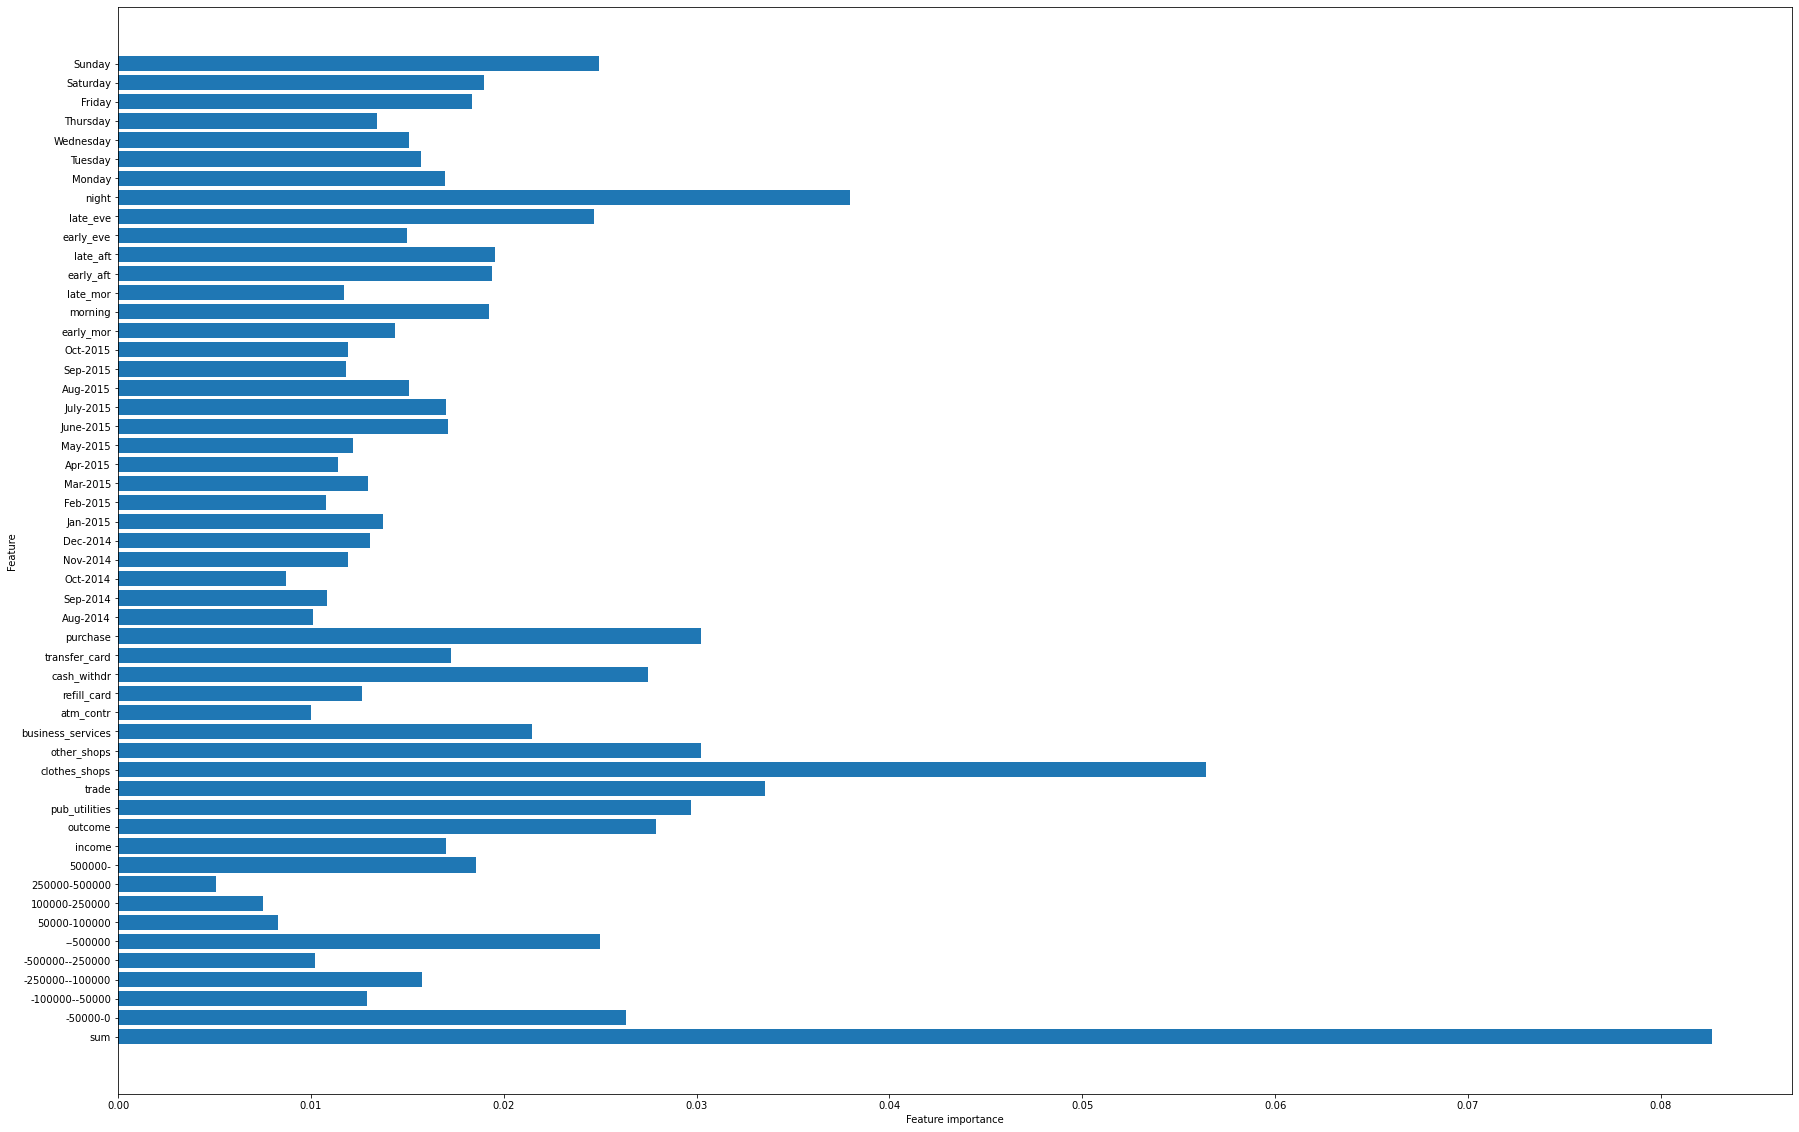

In [358]:
def plot_feature_importances_cancer(model):
    plt.figure(figsize=(30,20))
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), column_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
plot_feature_importances_cancer(forest)

In [359]:
params = {
    'max_depth': [1,5,10,15,20,25],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}

In [360]:
from sklearn.model_selection import GridSearchCV


In [361]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=forest,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [362]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   15.4s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   37.8s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.5min finished


Wall time: 2min 31s


GridSearchCV(cv=4,
             estimator=RandomForestClassifier(max_depth=10, min_samples_leaf=5,
                                              n_estimators=200,
                                              random_state=120),
             n_jobs=-1,
             param_grid={'max_depth': [1, 5, 10, 15, 20, 25],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [363]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=200,
                       random_state=120)

In [364]:
forest = RandomForestClassifier(max_depth=25, min_samples_leaf=5, n_estimators=200,
                       random_state=120) 
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train))) 
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 0.946
Accuracy on test set: 0.625


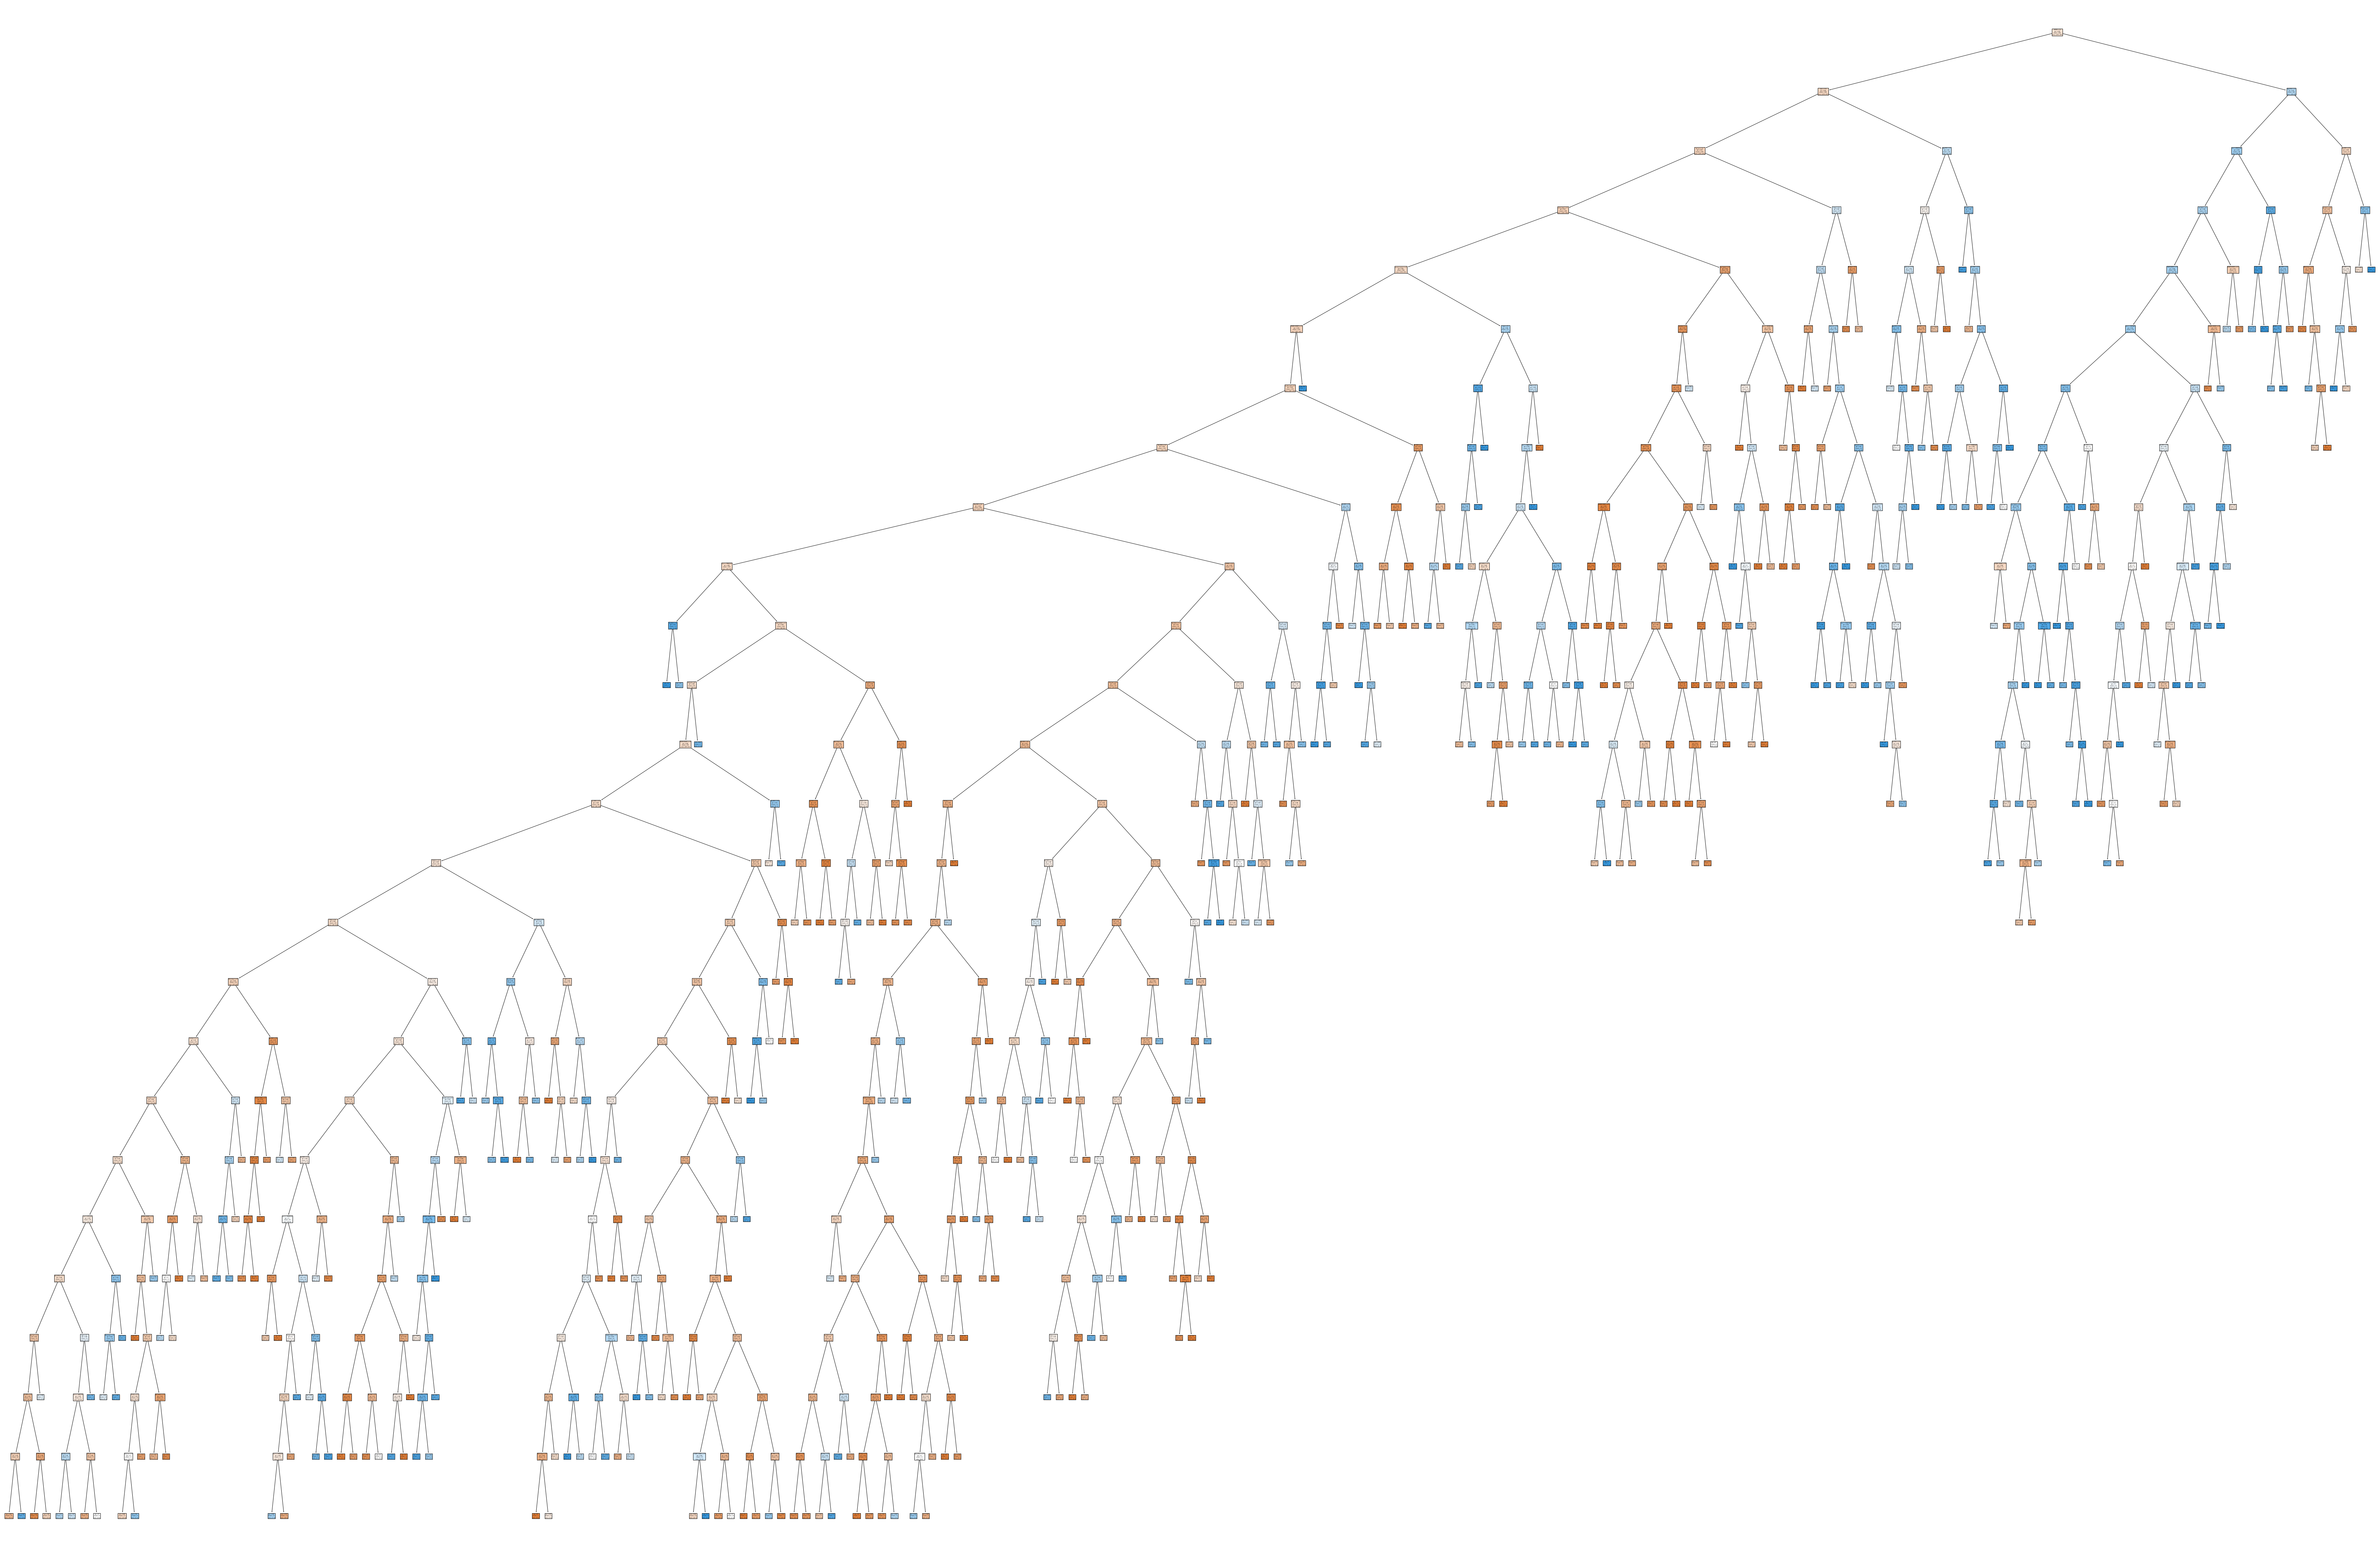

In [365]:
from sklearn.tree import plot_tree
plt.figure(figsize=(120,80))

plot_tree(rf_best.estimators_[5], 
          feature_names = column_names, filled=True);

In [366]:
from sklearn.tree import plot_tree
plt.figure(figsize=(200,150))

plot_tree(rf_best.estimators_[7], 
          feature_names = col_names, filled=True);

In [367]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [368]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0       1  accuracy  macro avg  weighted avg
precision     1.0     1.0       1.0        1.0           1.0
recall        1.0     1.0       1.0        1.0           1.0
f1-score      1.0     1.0       1.0        1.0           1.0
support    2496.0  2004.0       1.0     4500.0        4500.0
_______________________________________________
Confusion Matrix: 
 [[2496    0]
 [   0 2004]]

Test Result:
Accuracy Score: 62.33%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy    macro avg  weighted avg
precision    0.640483    0.589744  0.623333     0.615113      0.618293
recall       0.753555    0.455793  0.623333     0.604674      0.623333
f1-score     0.692433    0.514187  0.623333     0.603310      0.614480
support    844.000000  656.000000  0.623333  1500.000000   1500.000000
____________________________

In [369]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score

In [370]:
from sklearn.metrics import confusion_matrix
y_true = y_test
y_predicted = forest.predict(X_test)
confusion_matrix(y_true, y_predicted)

array([[636, 208],
       [354, 302]], dtype=int64)

In [371]:
probs = forest.predict_proba(X_test)

In [372]:
female_probs = probs[:,1]
fpr, tpr, thresholds = roc_curve(y_test, female_probs)
roc_auc = auc(fpr, tpr)


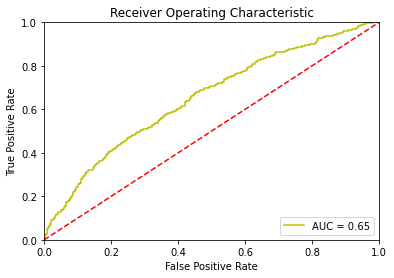

In [373]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\Users\Jace\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\Jace\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Jace\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\Jace\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value encountered in true_divide

C:\Users\Jace\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:540: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

C:\Users\Jace\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:544: RuntimeWarning:

invalid value

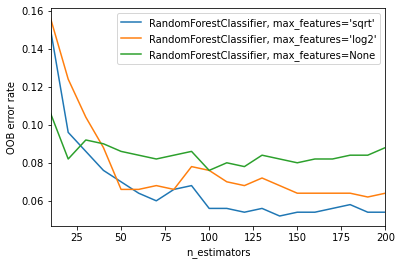

In [378]:
import matplotlib.pyplot as plt

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

RANDOM_STATE = 123

# Generate a binary classification dataset.
X, y = make_classification(
    n_samples=500,
    n_features=25,
    n_clusters_per_class=1,
    n_informative=15,
    random_state=RANDOM_STATE,
)

# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    (
        "RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(
            warm_start=True,
            oob_score=True,
            max_features="sqrt",
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(
            warm_start=True,
            max_features="log2",
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
    (
        "RandomForestClassifier, max_features=None",
        RandomForestClassifier(
            warm_start=True,
            max_features=None,
            oob_score=True,
            random_state=RANDOM_STATE,
        ),
    ),
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 10
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 10):
        clf.set_params(n_estimators=i)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [379]:
pip install xgboost

In [380]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier

In [381]:
X_test

array([[-7.69542800e+04,  4.00000000e+00,  2.00000000e+00, ...,
         1.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       [-2.11250800e+04,  4.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-9.59983920e+05,  2.50000000e+01,  1.00000000e+00, ...,
         4.00000000e+00,  3.00000000e+00,  3.00000000e+00],
       ...,
       [-3.70261690e+05,  6.00000000e+00,  2.00000000e+00, ...,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       [ 1.01066200e+04,  1.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  2.00000000e+00,  0.00000000e+00],
       [-1.20167343e+06,  2.00000000e+01,  2.00000000e+00, ...,
         3.00000000e+00,  4.00000000e+00,  5.00000000e+00]])

In [382]:
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Accuracy score: {}".format(accuracy_score(y_test, y_pred)))
    print("---") 

def print_scorex(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Accuracy score: {}".format(accuracy_score(X_train, y_pred)))
    print("---") 

In [383]:
dummy = DummyClassifier(strategy='prior')
sgd = SGDClassifier()
mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()
mlpc = MLPClassifier()
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')


for classifier in [dummy, perceptron, pac, xgb]:
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Accuracy score: 0.5626666666666666
---
Clf:  Perceptron
Accuracy score: 0.5313333333333333
---
Clf:  PassiveAggressiveClassifier
Accuracy score: 0.486
---
Clf:  XGBClassifier
Accuracy score: 0.5953333333333334
---


# KNN

In [384]:
independent = transactions.iloc[:,0:53]
independent.head()

sum  -50000-0  -100000--50000  -250000--100000  -500000--250000  \
0    50847.54         6               0                0                0   
1    74115.21         2               0                0                0   
2 -2589800.29         7               1                2                0   
3   693495.66        11               6                3                0   
4 -1382413.97        17               0                0                0   

   --500000  50000-100000  100000-250000  250000-500000  500000-  ...  \
0         0             0              0              0        0  ...   
1         0             1              0              0        0  ...   
2         2             0              0              0        1  ...   
3         0             0              4              0        1  ...   
4         2             0              0              0        0  ...   

   late_eve  night  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
0         1      0       1        1          1         2       2         1   
1         0      0       0        0          1         1       0         1   
2         0      4       2        2          1         2       3         1   
3         4      4       5        5          1         4       4         5   
4         3      2       5        3          2         2       3         5   

   Sunday  target  
0       1       1  
1       1       1  
2       2       0  
3       2       0  
4       1       1  

[5 rows x 53 columns]

In [385]:
dependent = transactions['target']
dependent.head()

0    1
1    1
2    0
3    0
4    1
Name: target, dtype: int64

In [386]:
from sklearn.model_selection import train_test_split #importing libraries
from sklearn.preprocessing import StandardScaler #importing libraries

scaler = StandardScaler()
scaler.fit(transactions.drop('target', axis=1)) #standarize our data without the target column

# Transforming the data
scaled_features = scaler.transform(transactions.drop('target', axis=1)) 
scaled_features

# Use the scaler to create scaler dataframe
# This gives us a standardized version of our data
independent = pd.DataFrame(scaled_features, columns=transactions.columns[:-1])
independent.head()

#Splitting our data 
X = independent
y = transactions['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [387]:
# Use the scaler to create scaler dataframe
# This gives us a standardized version of our data

independent = pd.DataFrame(scaled_features, columns=transactions.columns[:-1])
independent.head()

sum  -50000-0  -100000--50000  -250000--100000  -500000--250000  \
0  0.095374 -0.431007       -0.600354        -0.529061        -0.384909   
1  0.102626 -0.843898       -0.600354        -0.529061        -0.384909   
2 -0.727739 -0.327784        0.133276         0.875216        -0.384909   
3  0.295692  0.085107        3.801430         1.577354        -0.384909   
4 -0.351386  0.704444       -0.600354        -0.529061        -0.384909   

   --500000  50000-100000  100000-250000  250000-500000   500000-  ...  \
0 -0.247022     -0.095372      -0.187833        -0.2733 -0.236923  ...   
1 -0.247022      0.231243      -0.187833        -0.2733 -0.236923  ...   
2  1.561559     -0.095372      -0.187833        -0.2733  1.050702  ...   
3 -0.247022     -0.095372       1.776433        -0.2733  1.050702  ...   
4  1.561559     -0.095372      -0.187833        -0.2733 -0.236923  ...   

   early_eve  late_eve     night    Monday   Tuesday  Wednesday  Thursday  \
0  -0.235715 -0.162315 -0.309372 -0.211158 -0.180449  -0.177185 -0.042650   
1  -0.235715 -0.419891 -0.309372 -0.390841 -0.321609  -0.177185 -0.185292   
2  -0.558835 -0.419891  0.136302 -0.031474 -0.039289  -0.177185 -0.042650   
3   1.379880  0.610410  0.136302  0.507575  0.384190  -0.177185  0.242634   
4   0.733642  0.352835 -0.086535  0.507575  0.101870  -0.037413 -0.042650   

     Friday  Saturday    Sunday  
0 -0.067969 -0.212024 -0.176049  
1 -0.350778 -0.212024 -0.176049  
2  0.073436 -0.212024  0.060417  
3  0.214841  0.588822  0.060417  
4  0.073436  0.588822 -0.176049  

[5 rows x 52 columns]

In [388]:
X = independent
y = transactions['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [389]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5) # k=5
knn.fit(X_train, y_train) #Fit the k-nearest neighbors classifier from the training dataset
pred = knn.predict(X_test)#Predict the class labels for the X_test
pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

In [390]:
#from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#print (confusion_matrix(y_test, pred))
#print (classification_report(y_test, pred))
#print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)))

Let's find the k with the lowest error rate through iterations.The error rate is what we want to minimize, so we want to know the k that gives the smallest error rate. Almost 0.40 is a very high error rate, but it is the best we're able to find. Let's now run the model again with k=37 again instead of k=1.

In [391]:
error_rate = []

for i in range(1,40): # Checking every possible k value between 1-40
    knn = KNeighborsClassifier(n_neighbors=i)#go throw loop
    knn.fit(X_train, y_train)#Fit the k-nearest neighbors classifier from the training datase
    pred_i = knn.predict(X_test)#Predict the class labels for the X_test
    error_rate.append(np.mean(pred_i != y_test))
    
error_rate

[0.4527777777777778,
 0.44333333333333336,
 0.44222222222222224,
 0.4338888888888889,
 0.4361111111111111,
 0.42277777777777775,
 0.425,
 0.42777777777777776,
 0.43166666666666664,
 0.42333333333333334,
 0.4122222222222222,
 0.4166666666666667,
 0.40555555555555556,
 0.4177777777777778,
 0.41333333333333333,
 0.4222222222222222,
 0.4177777777777778,
 0.42444444444444446,
 0.42,
 0.41944444444444445,
 0.4166666666666667,
 0.41833333333333333,
 0.42,
 0.4177777777777778,
 0.4216666666666667,
 0.4211111111111111,
 0.41444444444444445,
 0.4166666666666667,
 0.4072222222222222,
 0.4077777777777778,
 0.4088888888888889,
 0.4111111111111111,
 0.40555555555555556,
 0.40944444444444444,
 0.4061111111111111,
 0.4083333333333333,
 0.405,
 0.41055555555555556,
 0.4027777777777778]

Text(0, 0.5, 'Mean error rate')

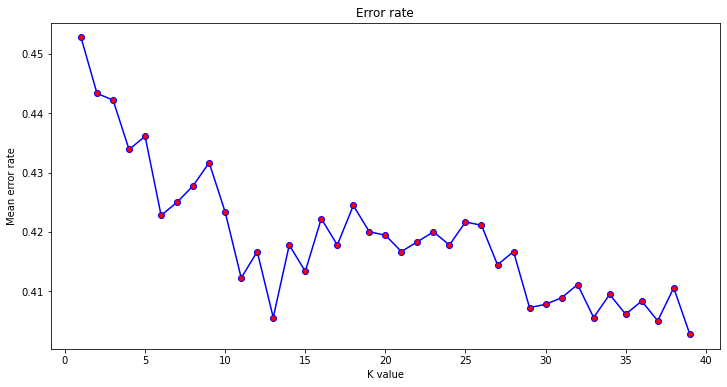

In [392]:
plt.figure(figsize=(12,6))
plt.plot(range(1,40), error_rate, color='blue', marker='o', markerfacecolor='red')
plt.title('Error rate')
plt.xlabel('K value')
plt.ylabel('Mean error rate')

In [393]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier(n_neighbors=37)# the min error rate at k value 37
knn.fit(X_train, y_train)#Fit the k-nearest neighbors classifier from the training datase
y_pred = knn.predict(X_test)#predict to X_test

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print ('Accuracy Score: ' + str(accuracy_score(y_test, y_pred)*100) + '%')

[[810 172]
 [557 261]]
              precision    recall  f1-score   support

           0       0.59      0.82      0.69       982
           1       0.60      0.32      0.42       818

    accuracy                           0.59      1800
   macro avg       0.60      0.57      0.55      1800
weighted avg       0.60      0.59      0.57      1800

Accuracy Score: 59.5%


#### for the class 0: 
- Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. 
High precision(точность) relates to the low false positive rate. We have got 0.59 precision which is not bad.
- Recall (Sensitivity) - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes.
We have got recall of 0.82 which is good for this model as it’s above 0.5.
- F1 score - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account.


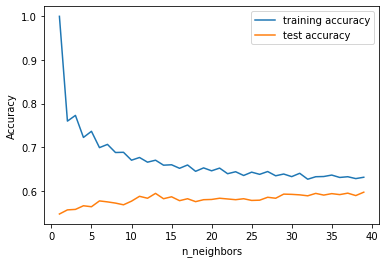

In [394]:
training_accuracy = [] 
test_accuracy = []
# try n_neighbors from 1 to 10 
neighbors_settings = range(1, 40)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors) 
    clf.fit(X_train, y_train)
    # record training set accuracy 
    training_accuracy.append(clf.score(X_train, y_train)) 
    # record generalization accuracy 
    test_accuracy.append(clf.score(X_test, y_test))
    
    
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label="test accuracy") 
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

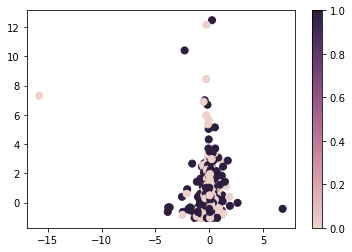

In [395]:
#maybe no need
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter( X_test.iloc[:,0], X_test.iloc[:,1], c = y_test , s=50, cmap=cmap )
f.colorbar(points)
plt.show()

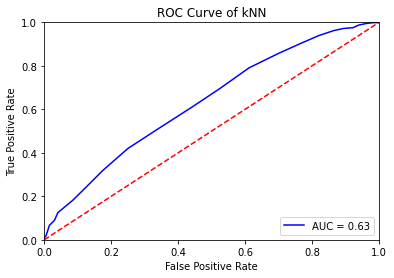

In [396]:
from sklearn import metrics
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = metrics.roc_curve(y_test, y_scores[:, 1])
roc_auc =  metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

ROC tell us how good model is for distinguishing the given classes, in terms of of predicted probability.
ROC curve has FPR(FALSE POSITIVE RATE) on the X-axis and TPR(TRUE POSITIVE RATE) on the Y-axis
The ideal corresponds to the ROC-curve passing through the point (0, 1), the area under it is equal to 1. The worst is the ROC-curve passing through the point (1, 0), the area under it is 0. Random - something similar to a diagonal square , the area is approximately equal to 0.5.
When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.
When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.
In fact, any point on the red line corresponds to a situation where True Positive Rate is equal to False Positive Rate.

References
##### https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/#h2_1
##### https://www.kaggle.com/kwullum/using-ml-algorithms-to-predict-gender-of-customers
##### https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/comment-page-1/#:~:text=%D0%A7%D0%B0%D1%81%D1%82%D0%BE%20%D1%80%D0%B5%D0%B7%D1%83%D0%BB%D1%8C%D1%82%D0%B0%D1%82%20%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D1%8B%20%D0%B0%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC%D0%B0%20%D0%BD%D0%B0,%3D%20area%20under%20the%20curve).
##### https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/#:~:text=F1%20score%20%2D%20F1%20Score%20is,have%20an%20uneven%20class%20distribution.

# Decision tree algorithm

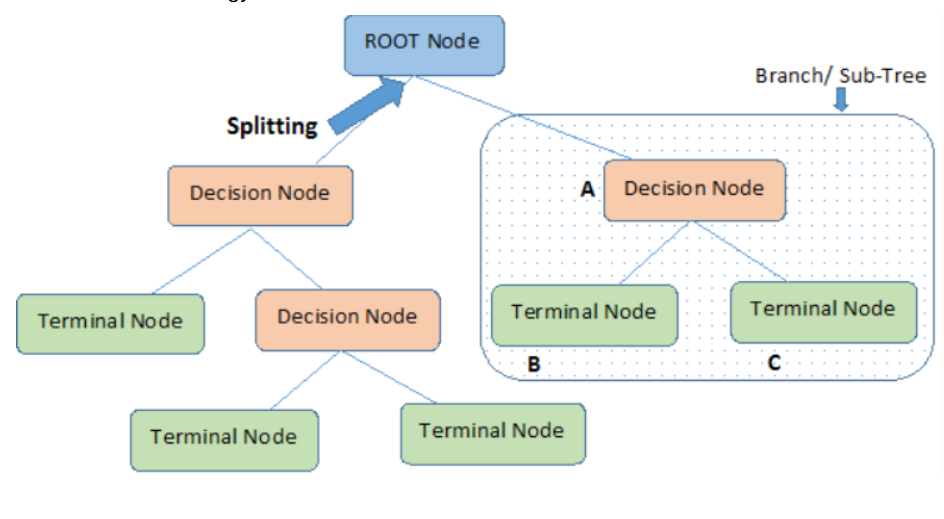

In [398]:
new_transactions=transactions

<AxesSubplot:xlabel='target', ylabel='count'>

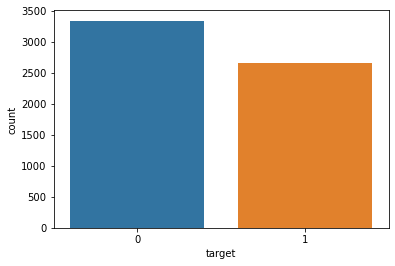

In [399]:
sns.countplot(x='target', data=new_transactions)

In [400]:
X = new_transactions.drop(['target'], axis=1)

y = new_transactions['target']

In [401]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [402]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)


In [403]:
X_train.shape, X_test.shape


((4020, 52), (1980, 52))

In [404]:
y_train.shape, y_test.shape


((4020,), (1980,))

In [405]:
pip install graphviz

In [406]:
transactions

sum  -50000-0  -100000--50000  -250000--100000  -500000--250000  \
0       50847.54         6               0                0                0   
1       74115.21         2               0                0                0   
2    -2589800.29         7               1                2                0   
3      693495.66        11               6                3                0   
4    -1382413.97        17               0                0                0   
...          ...       ...             ...              ...              ...   
5995   -72052.13         5               0                0                0   
5996  -667589.93         7               3                2                0   
5997  -336887.37         0               0                0                1   
5998  -224591.58         0               0                1                0   
5999   569609.16         1               1                0                0   

      --500000  50000-100000  100000-250000  250000-500000  500000-  ...  \
0            0             0              0              0        0  ...   
1            0             1              0              0        0  ...   
2            2             0              0              0        1  ...   
3            0             0              4              0        1  ...   
4            2             0              0              0        0  ...   
...        ...           ...            ...            ...      ...  ...   
5995         0             0              0              0        0  ...   
5996         0             0              0              0        0  ...   
5997         0             0              0              0        0  ...   
5998         0             0              0              0        0  ...   
5999         0             1              0              0        1  ...   

      late_eve  night  Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  \
0            1      0       1        1          1         2       2         1   
1            0      0       0        0          1         1       0         1   
2            0      4       2        2          1         2       3         1   
3            4      4       5        5          1         4       4         5   
4            3      2       5        3          2         2       3         5   
...        ...    ...     ...      ...        ...       ...     ...       ...   
5995         0      0       1        0          0         2       2         0   
5996         0      1       4        3          2         0       3         0   
5997         0      0       1        0          0         0       0         0   
5998         0      0       0        0          1         0       0         0   
5999         0      0       0        1          3         0       0         0   

      Sunday  target  
0          1       1  
1          1       1  
2          2       0  
3          2       0  
4          1       1  
...      ...     ...  
5995       0       0  
5996       0       0  
5997       0       1  
5998       0       0  
5999       0       1  

[6000 rows x 53 columns]

# Using entropy selection measure

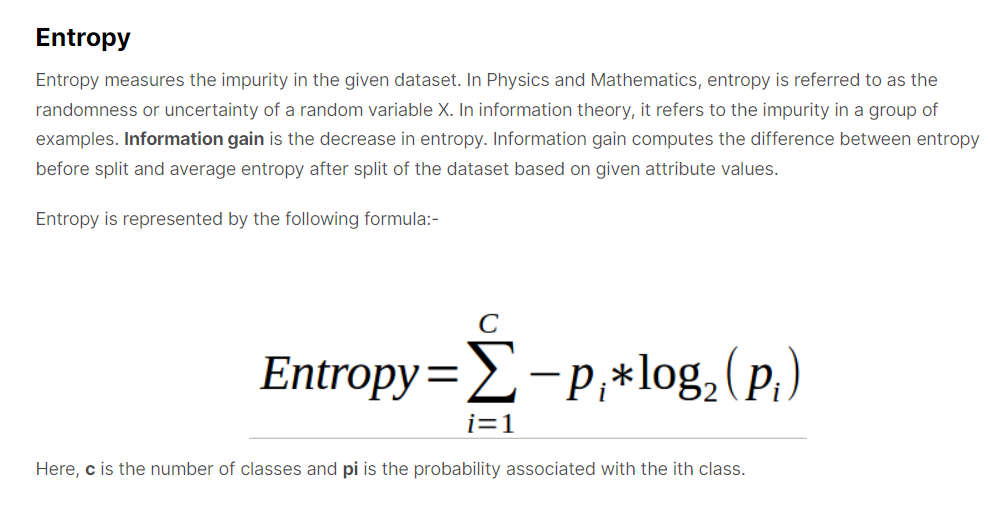

In [407]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [408]:
y_pred_en = clf_en.predict(X_test)


In [409]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.5843


In [410]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([1, 0, 1, ..., 0, 0, 0], dtype=int64)

In [411]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.6055
Test set score: 0.5843


# Decision tree classifier

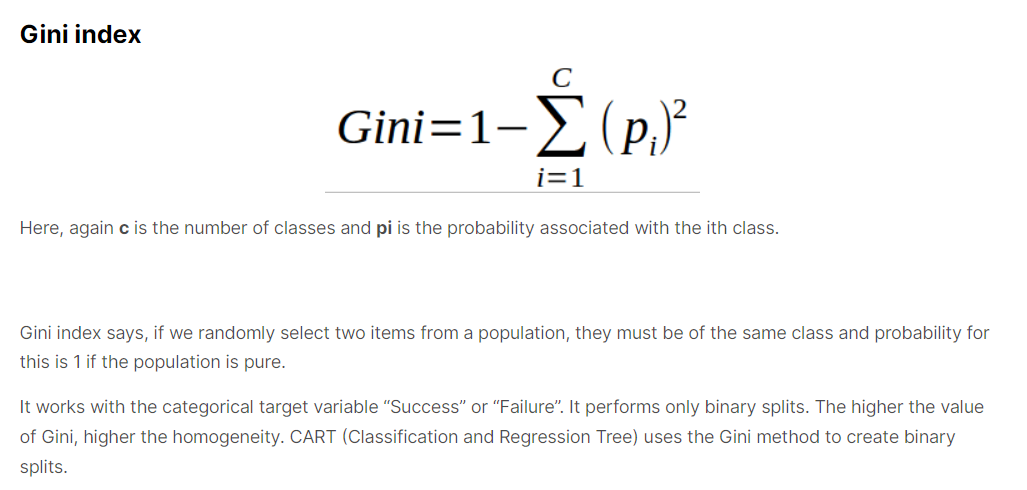

In [412]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

tree = DecisionTreeClassifier(max_depth=5, random_state=17)

tree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=17)

In [413]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [414]:
X_train.shape

(4020, 52)

In [415]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=5,random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 63.26%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.625499     0.653543  0.632587     0.639521      0.637980
recall        0.842223     0.371157  0.632587     0.606690      0.632587
f1-score      0.717861     0.473440  0.632587     0.595650      0.609087
support    2231.000000  1789.000000  0.632587  4020.000000   4020.000000
_______________________________________________
Confusion Matrix: 
 [[1879  352]
 [1125  664]]

Test Result:
Accuracy Score: 58.59%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.598905    0.549133  0.585859     0.574019      0.577010
recall        0.788999    0.327210  0.585859     0.558105      0.585859
f1-score      0.680934    0.410072  0.585859     0.545503      0.561782
support    1109.000000  871.000000  

<BarContainer object of 52 artists>

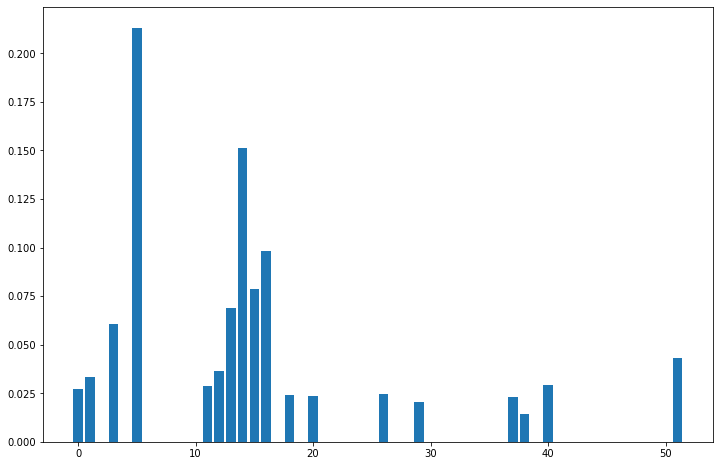

In [416]:
plt.figure(figsize=(12, 8))
plt.bar(np.arange(X.shape[1]), np.squeeze(np.abs(tree_clf.feature_importances_)))

In [417]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "max_depth":(list(range(1, 11 ))), 
    "min_samples_split":[2, 3, 4,5,6], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(max_depth=5,random_state=17)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 1900 candidates, totalling 9500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.2s
[Parallel(n_jobs=-1)]: Done 560 tasks      | elapsed:   23.2s
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:   42.0s
[Parallel(n_jobs=-1)]: Done 2960 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 4760 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 6960 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 9500 out of 9500 | elapsed:  3.3min finished


Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 14, 'min_samples_split': 2})
Train Result:
Accuracy Score: 61.89%
_______________________________________________
CLASSIFICATION REPORT:
                     0            1  accuracy    macro avg  weighted avg
precision     0.613955     0.634837  0.618905     0.624396      0.623248
recall        0.844016     0.338178  0.618905     0.591097      0.618905
f1-score      0.710834     0.441284  0.618905     0.576059      0.590878
support    2231.000000  1789.000000  0.618905  4020.000000   4020.000000
_______________________________________________
Confusion Matrix: 
 [[1883  348]
 [1184  605]]

Test Result:
Accuracy Score: 58.13%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.591743    0.546256  0.581313     0.568999      0.571733
recall        0.814247    0.284730  0.581313     0.549489      0.581313
f1-sc

[Text(334.8, 391.392, 'X[5] <= 0.5\ngini = 0.494\nsamples = 4020\nvalue = [2231, 1789]'),
 Text(167.4, 304.416, 'X[14] <= 0.5\ngini = 0.486\nsamples = 3459\nvalue = [2017, 1442]'),
 Text(83.7, 217.44, 'X[16] <= 0.5\ngini = 0.493\nsamples = 2917\nvalue = [1625, 1292]'),
 Text(41.85, 130.464, 'X[15] <= 8.5\ngini = 0.489\nsamples = 2677\nvalue = [1539, 1138]'),
 Text(20.925, 43.488, 'gini = 0.482\nsamples = 2318\nvalue = [1378, 940]'),
 Text(62.775000000000006, 43.488, 'gini = 0.495\nsamples = 359\nvalue = [161, 198]'),
 Text(125.55000000000001, 130.464, 'X[51] <= 3.5\ngini = 0.46\nsamples = 240\nvalue = [86, 154]'),
 Text(104.625, 43.488, 'gini = 0.488\nsamples = 184\nvalue = [78, 106]'),
 Text(146.475, 43.488, 'gini = 0.245\nsamples = 56\nvalue = [8, 48]'),
 Text(251.10000000000002, 217.44, 'X[3] <= 1.5\ngini = 0.4\nsamples = 542\nvalue = [392, 150]'),
 Text(209.25, 130.464, 'X[13] <= 11.5\ngini = 0.342\nsamples = 421\nvalue = [329, 92]'),
 Text(188.32500000000002, 43.488, 'gini = 0.287

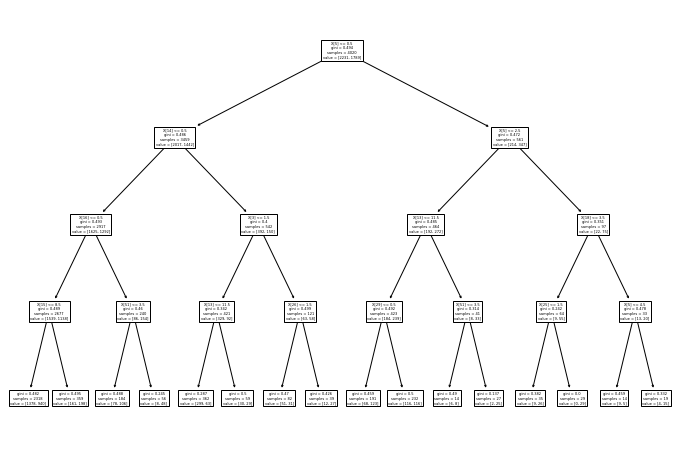

In [418]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(tree_clf.fit(X_train, y_train)) 

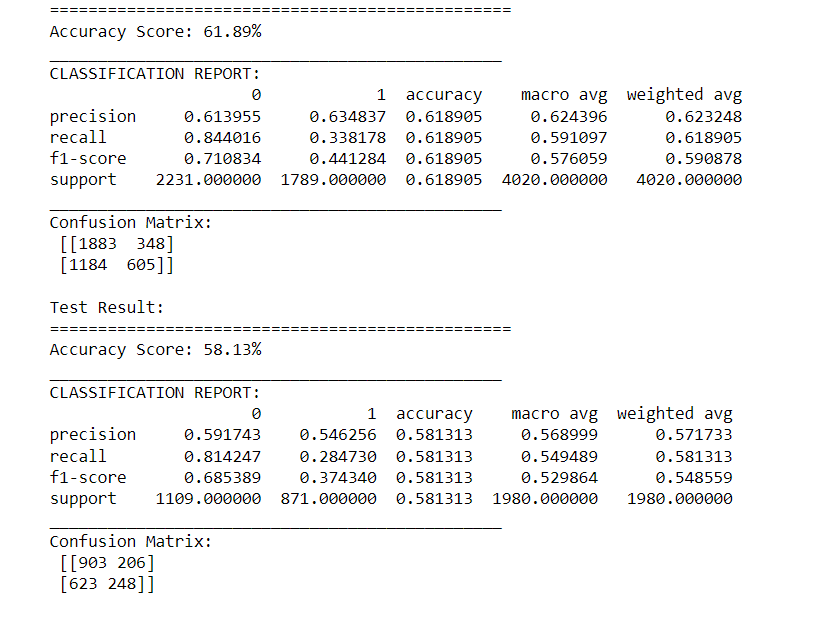